In [1]:
library(tidyverse) # Sagemaker has
install.packages("timetk") # Sagemaker doesn't have
library(timetk)
library(lubridate) # Sagemaker has
install.packages("ggridges") # Sagemaker doesn't have
library(ggridges)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

also installing the dependencies ‘quadprog’, ‘furrr’, ‘crosstalk’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘tsfeatures’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Read in all files from the Data/Processed directory
england_fnames <- list.files("Data/Intermediate/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Intermediate/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Intermediate/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

Rows: 35044 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35044 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35041 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35044 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35044 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35043 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35042 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35042 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35041 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35041 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35041 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35045 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35045 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 105120 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 105120 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or

Rows: 105120 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
length(england_df_list)

[1] 38

In [4]:
length(portland_df_list)

[1] 19

In [5]:
length(utah_df_list)

[1] 19

In [6]:
length(total_df_list)

[1] 76

# Data Missingness

## Percent Missing per Sensor

In [7]:
england_missing <- lapply(england_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))
portland_missing <- lapply(portland_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))                          
utah_missing <- lapply(utah_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))  
total_missing <- lapply(total_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))  

In [8]:
mean(unlist(england_missing))

[1] 0.6769152

In [9]:
mean(unlist(portland_missing))

[1] 1.942261

In [10]:
mean(unlist(utah_missing))

[1] 0.02283105

In [11]:
mean(unlist(total_missing))

[1] 0.8297307

# Explortation of Imputation Methods for Missing Values

In [12]:
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))                          

In [13]:
set.seed(54321)
starting_points <- sample(1:((96*365)-(96*12*7)), length(total_df_list), replace=FALSE)
ending_points <- starting_points + (96*7*12) - 1

In [14]:
set.seed(54321)
eng_eda <- sample(1:length(england_df_list), 1)
por_eda <- sample(1:length(portland_df_list), 1)
uta_eda <- sample(1:length(utah_df_list), 1)

In [15]:
england_sample <- england_df_list[[eng_eda]]
england_highway_name <- str_split(england_sample$site_name[1], '/')[[1]][1]
england_sensor_name <- str_split(england_sample$site_name[1], '/')[[1]][2]

In [16]:
portland_sample <- portland_df_list[[por_eda]]
portland_highway_name <- str_split(portland_sample$site_name[1], '/')[[1]][1]
portland_sensor_name <- str_split(portland_sample$site_name[1], '/')[[1]][2]

In [17]:
utah_sample <- utah_df_list[[uta_eda]]
utah_highway_name <- str_split(utah_sample$site_name[1], '/')[[1]][1]
utah_sensor_name <- str_split(utah_sample$site_name[1], '/')[[1]][2]

In [23]:
england_sample <- england_sample[starting_points[eng_eda]:ending_points[eng_eda], ] %>% 
    mutate(rn = row_number()) %>%
    mutate(train_val_test = ifelse(rn <= (96*7*8), "train", ifelse(rn <= (96*7*10), "val", "test")))

In [21]:
portland_sample <- portland_sample[starting_points[length(england_df_list) + por_eda]:ending_points[length(england_df_list) + por_eda], ] %>%
    mutate(rn = row_number()) %>%
    mutate(train_val_test = ifelse(rn <= (96*7*8), "train", ifelse(rn <= (96*7*10), "val", "test")))

In [22]:
utah_sample <- utah_sample[starting_points[length(england_df_list) + length(portland_df_list) + uta_eda]:ending_points[length(england_df_list) + length(portland_df_list) + uta_eda], ] %>%
    mutate(rn = row_number()) %>%
    mutate(train_val_test = ifelse(rn <= (96*7*8), "train", ifelse(rn <= (96*7*10), "val", "test")))

## England

In [25]:
which(england_sample$missing_volume == TRUE)

[1] 1398 2100 3873 4470 4471 4472 4473 4474 4475 4476 4477 4478 7824

### Initial Linear Interpolation

In [26]:
eng_lin_int <- ggplot(england_sample[(4470-192):(4470+192), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Linear Interpolation Example for {england_highway_name} at Sensor {england_sensor_name}"))

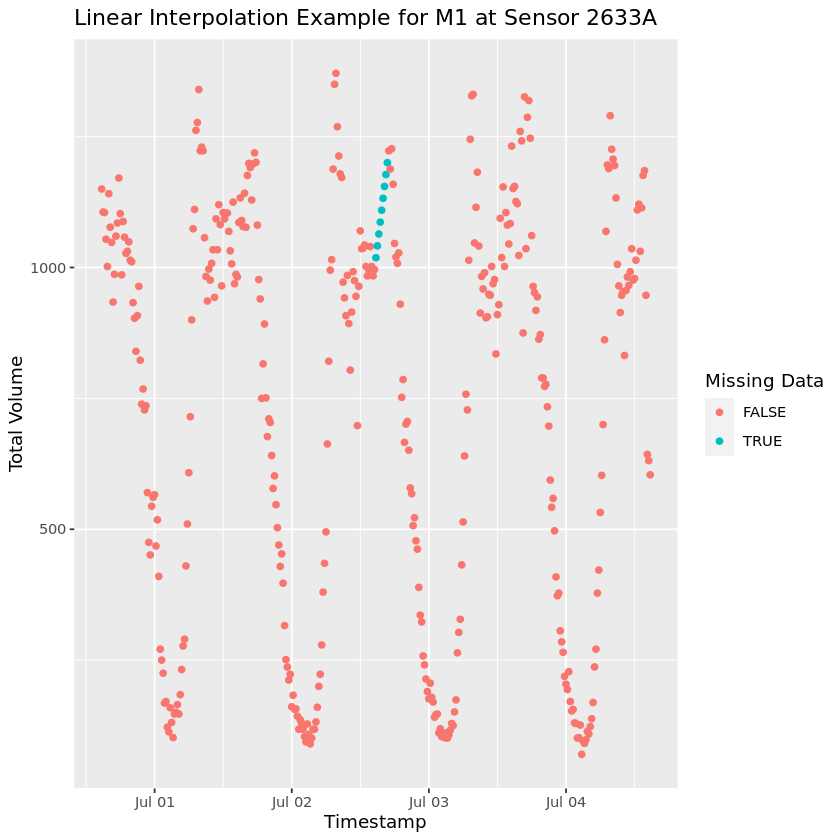

In [27]:
eng_lin_int

In [22]:
ggsave("Plots/EDA/eng_lin_inter.png", eng_lin_int, width=10, height=5)

### Manual Seasonal Interp

In [23]:
head(england_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
M1/2633A,3,2019-02-14,45,2019-02-14 16:44:00,66,49.75,1250.000,TRUE,TRUE
M1/2633A,3,2019-02-14,45,2019-02-14 16:59:00,67,42.50,1216.000,TRUE,TRUE
M1/2633A,3,2019-02-14,45,2019-02-14 17:14:00,68,35.25,1182.000,TRUE,TRUE
M1/2633A,2,2019-02-20,51,2019-02-20 10:59:00,43,63.00,1106.667,TRUE,TRUE
M1/2633A,2,2019-02-20,51,2019-02-20 11:14:00,44,63.00,1087.333,TRUE,TRUE
M1/2633A,3,2019-03-07,66,2019-03-07 11:44:00,46,10.00,333.500,TRUE,TRUE


In [24]:
england_sample <- england_sample %>% mutate(vol = ifelse(missing_volume, NA, total_volume))

In [25]:
eng_missing_vol_list <- which(england_sample$missing_volume==TRUE)

In [26]:
eng_bf <- c()
for (ind in eng_missing_vol_list) {
  doy <- england_sample[ind, 4]$day_of_year
  iod <- england_sample[ind, 6]$interval_of_day
  if (doy < 15) {
    doy_list <- c(doy-7, doy-6, doy-5, doy-4, doy-3, doy-2, doy-1)
  }
  else {
    doy_list <- c(doy-49, doy-42, doy-35, doy-28, doy-21, doy-14, doy-7)
  }
  
  bf_values <- na.omit((england_sample %>% 
                  arrange(desc(timestamp)) %>% 
                  filter(day_of_year %in% doy_list) %>% 
                  filter(interval_of_day==iod))$vol)
  
  n <- length(bf_values)
  
#   weights <- n:1/(sum(1:n))
  
#   bf_value <- round(weighted.mean(bf_values, 
#                                   weights,
#                                   na.rm=T))
    
  bf_value <- median(bf_values)  
    
  eng_bf <- c(eng_bf, bf_value)
}

In [27]:
england_sample$vol <- replace(england_sample$vol, eng_missing_vol_list, eng_bf)

In [28]:
head(england_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,vol
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
M1/2633A,3,2019-02-14,45,2019-02-14 16:44:00,66,49.75,1250.000,TRUE,TRUE,1125.0
M1/2633A,3,2019-02-14,45,2019-02-14 16:59:00,67,42.50,1216.000,TRUE,TRUE,1254.0
M1/2633A,3,2019-02-14,45,2019-02-14 17:14:00,68,35.25,1182.000,TRUE,TRUE,1188.5
M1/2633A,2,2019-02-20,51,2019-02-20 10:59:00,43,63.00,1106.667,TRUE,TRUE,946.0
M1/2633A,2,2019-02-20,51,2019-02-20 11:14:00,44,63.00,1087.333,TRUE,TRUE,870.0
M1/2633A,3,2019-03-07,66,2019-03-07 11:44:00,46,10.00,333.500,TRUE,TRUE,968.0


In [29]:
eng_man_int <- ggplot(england_sample[(10000-192):(10000+192), ]) + 
    geom_point(aes(x=timestamp, y=vol, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Manual Seasonal Interpolation Example for {england_highway_name} at Sensor {england_sensor_name}"))

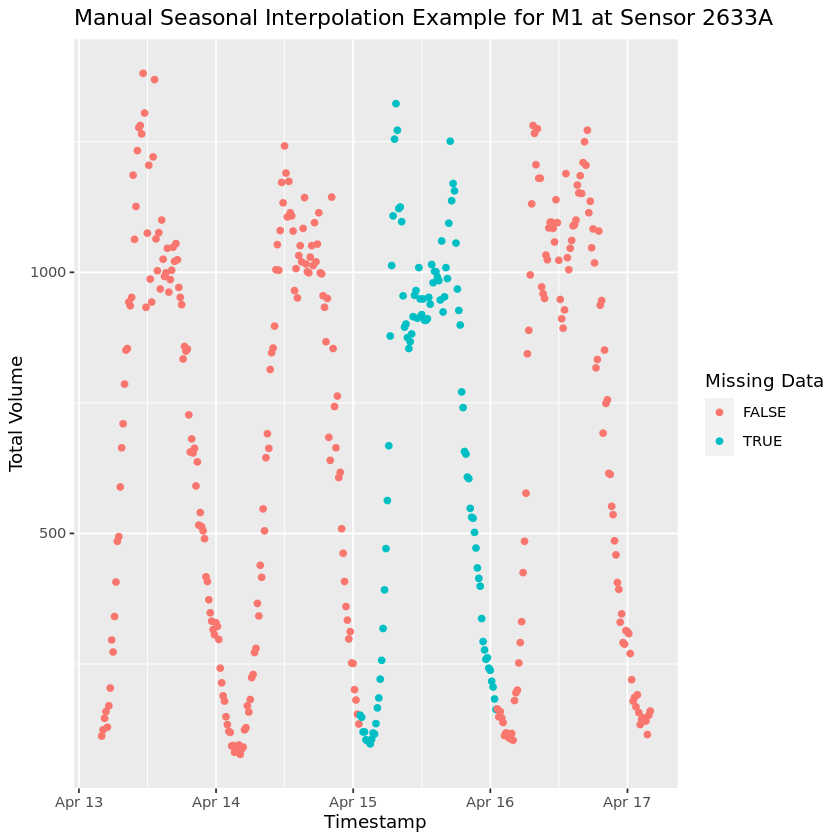

In [30]:
eng_man_int

In [31]:
ggsave("Plots/EDA/eng_man_inter.png", eng_man_int, width=10, height=5)

## Portland

In [29]:
which(portland_sample$missing_volume == TRUE)

[1] 1359 1378 1379 1380 1381 2372 2373 2375 2724 3079 3185 3186 3187 3188 3189
[16] 3190 3191 3192 3193 3194 3195 3738 6086

### Initial Linear Interpolation

In [30]:
port_lin_int <- ggplot(portland_sample[(3185-192):(3185+192), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Linear Interpolation Example for {portland_highway_name} at Sensor {portland_sensor_name}"))

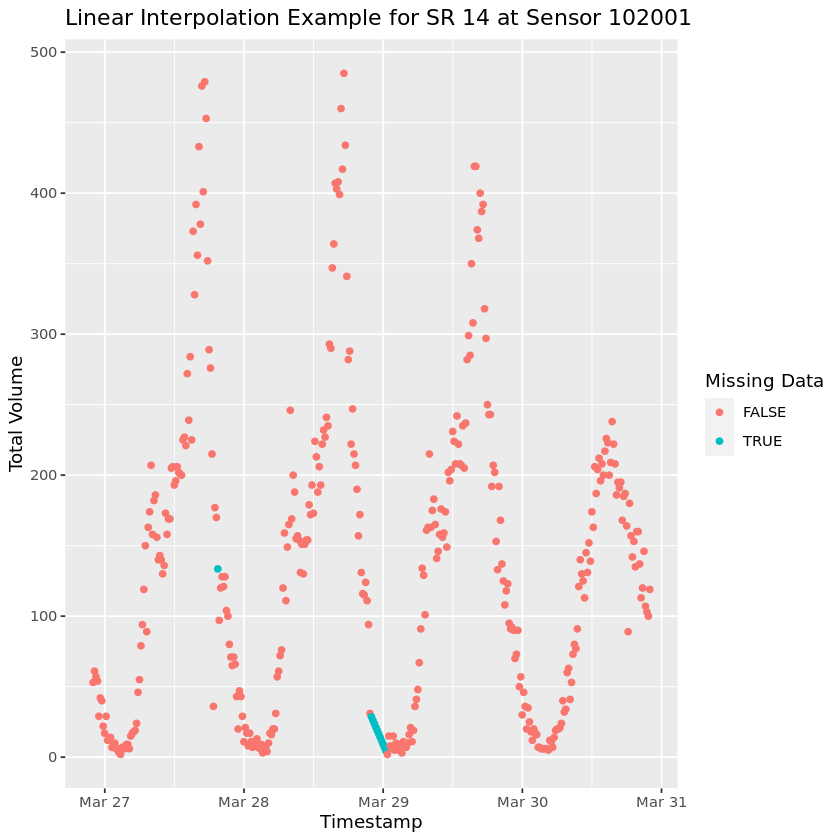

In [31]:
port_lin_int

In [35]:
ggsave("Plots/EDA/port_lin_inter.png", port_lin_int, width=10, height=5)

### Manual Seasonal Interp

In [36]:
head(portland_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
SR 14/102001,6,2019-01-13,13,2019-01-13 15:29:00,61,60,68.625,TRUE,TRUE
SR 14/102001,6,2019-01-13,13,2019-01-13 15:44:00,62,60,63.250,TRUE,TRUE
SR 14/102001,6,2019-01-13,13,2019-01-13 15:59:00,63,60,57.875,TRUE,TRUE
SR 14/102001,6,2019-01-13,13,2019-01-13 16:14:00,64,60,52.500,TRUE,TRUE
SR 14/102001,6,2019-01-13,13,2019-01-13 16:29:00,65,60,47.125,TRUE,TRUE
SR 14/102001,6,2019-01-13,13,2019-01-13 16:44:00,66,60,41.750,TRUE,TRUE


In [37]:
portland_sample <- portland_sample %>% mutate(vol = ifelse(missing_volume, NA, total_volume))

In [38]:
port_missing_vol_list <- which(portland_sample$missing_volume==TRUE)

In [39]:
port_bf <- c()
for (ind in port_missing_vol_list) {
  doy <- portland_sample[ind, 4]$day_of_year
  iod <- portland_sample[ind, 6]$interval_of_day
  if (doy < 15) {
    doy_list <- c(doy-7, doy-6, doy-5, doy-4, doy-3, doy-2, doy-1)
  }
  else {
    doy_list <- c(doy-49, doy-42, doy-35, doy-28, doy-21, doy-14, doy-7)
  }
  
  bf_values <- na.omit((portland_sample %>% 
                  arrange(desc(timestamp)) %>% 
                  filter(day_of_year %in% doy_list) %>% 
                  filter(interval_of_day==iod))$vol)
  
  n <- length(bf_values)
  
#   weights <- n:1/(sum(1:n))
  
#   bf_value <- round(weighted.mean(bf_values, 
#                                   weights,
#                                   na.rm=T))
    
  bf_value <- median(bf_values)
    
  port_bf <- c(port_bf, bf_value)
}

In [40]:
portland_sample$vol <- replace(portland_sample$vol, port_missing_vol_list, port_bf)

In [41]:
head(portland_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,vol
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
SR 14/102001,6,2019-01-13,13,2019-01-13 15:29:00,61,60,68.625,TRUE,TRUE,367
SR 14/102001,6,2019-01-13,13,2019-01-13 15:44:00,62,60,63.250,TRUE,TRUE,435
SR 14/102001,6,2019-01-13,13,2019-01-13 15:59:00,63,60,57.875,TRUE,TRUE,348
SR 14/102001,6,2019-01-13,13,2019-01-13 16:14:00,64,60,52.500,TRUE,TRUE,399
SR 14/102001,6,2019-01-13,13,2019-01-13 16:29:00,65,60,47.125,TRUE,TRUE,397
SR 14/102001,6,2019-01-13,13,2019-01-13 16:44:00,66,60,41.750,TRUE,TRUE,412


In [42]:
port_man_int <- ggplot(portland_sample[(22439-96):(22439+480), ]) + 
    geom_point(aes(x=timestamp, y=vol, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Manual Seasonal Interpolation Example for {portland_highway_name} at Sensor {portland_sensor_name}"))

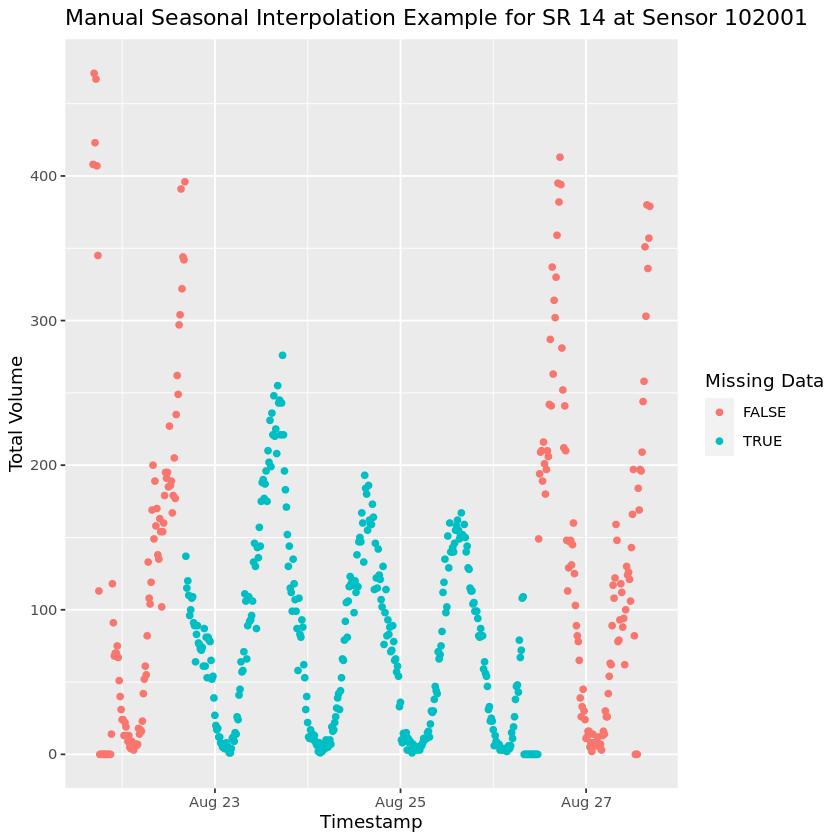

In [43]:
port_man_int

In [44]:
ggsave("Plots/EDA/port_man_inter.png", port_man_int, width=10, height=5)

# Manual Seasonal Imputation Across Full Data Set

In [45]:
man_seas_int <- function(df) {
    
    df <- df %>% mutate(total_volume=ifelse(missing_volume, NA, total_volume))
    
    missing_vol_list <- which(df$missing_volume==TRUE)
    
    bf <- c()
    
    for (ind in missing_vol_list) {
        
        doy <- df[ind, 4]$day_of_year
        iod <- df[ind, 6]$interval_of_day
        
        if (doy < 15) {
            doy_list <- c(doy-7, doy-6, doy-5, doy-4, doy-3, doy-2, doy-1)
        }
        else {
            doy_list <- c(doy-49, doy-42, doy-35, doy-28, doy-21, doy-14, doy-7) 
        }
        
        bf_values <- na.omit((df %>% 
                              arrange(desc(timestamp)) %>% 
                              filter(day_of_year %in% doy_list) %>% 
                              filter(interval_of_day==iod))$total_volume)   
        
        n <- length(bf_values)
        
#         weights <- n:1/(sum(1:n))
        
#         bf_value <- round(weighted.mean(bf_values,
#                                         weights,
#                                         na.rm=T))
        
        bf_value <- median(bf_values)
        
        bf <- c(bf, bf_value)
    }    
    
    df$total_volume <- replace(df$total_volume, missing_vol_list, bf)
    
    df
}

## England

In [46]:
# Impute each df in the england df list using the manual seasonal method explored above
england_df_list_int <- lapply(england_df_list, man_seas_int)

### Explore Data Set Lengths to Look for Issues (Like Daylight Savings)

In [47]:
# Length should be 35040 - lengths slightly above this indicate daylight savings is causing multiple entries 
# for one timestamp
lapply(england_df_list_int, function(x) nrow(x))

[[1]]
[1] 35044

[[2]]
[1] 35044

[[3]]
[1] 35041

[[4]]
[1] 35041

[[5]]
[1] 35044

[[6]]
[1] 35044

[[7]]
[1] 35044

[[8]]
[1] 35044

[[9]]
[1] 35044

[[10]]
[1] 35044

[[11]]
[1] 35044

[[12]]
[1] 35044

[[13]]
[1] 35044

[[14]]
[1] 35044

[[15]]
[1] 35044

[[16]]
[1] 35044

[[17]]
[1] 35044

[[18]]
[1] 35044

[[19]]
[1] 35041

[[20]]
[1] 35041

[[21]]
[1] 35041

[[22]]
[1] 35041

[[23]]
[1] 35044

[[24]]
[1] 35044

[[25]]
[1] 35042

[[26]]
[1] 35043

[[27]]
[1] 35042

[[28]]
[1] 35042

[[29]]
[1] 35044

[[30]]
[1] 35044

[[31]]
[1] 35041

[[32]]
[1] 35044

[[33]]
[1] 35043

[[34]]
[1] 35041

[[35]]
[1] 35040

[[36]]
[1] 35043

[[37]]
[1] 35044

[[38]]
[1] 35044

In [48]:
# Check the max interval of day value - if there are none above 95, then we can simply groupby timestamp to
# eliminate daylight savings issues 
# When doing so, we will avg the speed and take the max of the total volume for that timestamp - this is abritrary
# and other methods could be used, but with so few data points, it is unlikely to matter
lapply(england_df_list_int, function(x) max(x$interval_of_day))

[[1]]
[1] 95

[[2]]
[1] 95

[[3]]
[1] 95

[[4]]
[1] 95

[[5]]
[1] 95

[[6]]
[1] 95

[[7]]
[1] 95

[[8]]
[1] 95

[[9]]
[1] 95

[[10]]
[1] 95

[[11]]
[1] 95

[[12]]
[1] 95

[[13]]
[1] 95

[[14]]
[1] 95

[[15]]
[1] 95

[[16]]
[1] 95

[[17]]
[1] 95

[[18]]
[1] 95

[[19]]
[1] 95

[[20]]
[1] 95

[[21]]
[1] 95

[[22]]
[1] 95

[[23]]
[1] 95

[[24]]
[1] 95

[[25]]
[1] 95

[[26]]
[1] 95

[[27]]
[1] 95

[[28]]
[1] 95

[[29]]
[1] 95

[[30]]
[1] 95

[[31]]
[1] 95

[[32]]
[1] 95

[[33]]
[1] 95

[[34]]
[1] 95

[[35]]
[1] 95

[[36]]
[1] 95

[[37]]
[1] 95

[[38]]
[1] 95

In [49]:
# The timsteamps with issues indicate daylight savings is the likely culprit
lapply(england_df_list_int, function(x) (x %>%  
                                         group_by(timestamp) %>% 
                                         summarise(n=n()) %>% 
                                         ungroup() %>%
                                         arrange(desc(n)) %>%
                                         filter(n>1))$timestamp)

[[1]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[2]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[3]]
[1] "2019-10-27 01:59:00 UTC"

[[4]]
[1] "2019-10-27 01:59:00 UTC"

[[5]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[6]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[7]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[8]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[9]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[10]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" 

In [50]:
england_df_list_int <- lapply(england_df_list_int, 
                              function(x) x <- x %>% 
                                                group_by(site_name, 
                                                         day_of_week, 
                                                         date, 
                                                         day_of_year, 
                                                         timestamp, 
                                                         interval_of_day
                                                        ) %>%
                                                summarise(avg_mph=mean(avg_mph),
                                                          total_volume=max(total_volume),
                                                          missing_speed=max(missing_speed),
                                                          missing_volume=max(missing_volume)
                                                         ) %>%
                                               ungroup() %>%
                                               mutate(missing_speed=ifelse(missing_speed==1, TRUE, FALSE),
                                                      missing_volume=ifelse(missing_volume==1, TRUE, FALSE)
                                                     ))

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can over

In [51]:
# Check lengths again - if they are all 35040, we can write to file
lapply(england_df_list_int, function(x) nrow(x))

[[1]]
[1] 35040

[[2]]
[1] 35040

[[3]]
[1] 35040

[[4]]
[1] 35040

[[5]]
[1] 35040

[[6]]
[1] 35040

[[7]]
[1] 35040

[[8]]
[1] 35040

[[9]]
[1] 35040

[[10]]
[1] 35040

[[11]]
[1] 35040

[[12]]
[1] 35040

[[13]]
[1] 35040

[[14]]
[1] 35040

[[15]]
[1] 35040

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35040

[[19]]
[1] 35040

[[20]]
[1] 35040

[[21]]
[1] 35040

[[22]]
[1] 35040

[[23]]
[1] 35040

[[24]]
[1] 35040

[[25]]
[1] 35040

[[26]]
[1] 35040

[[27]]
[1] 35040

[[28]]
[1] 35040

[[29]]
[1] 35040

[[30]]
[1] 35040

[[31]]
[1] 35040

[[32]]
[1] 35040

[[33]]
[1] 35040

[[34]]
[1] 35040

[[35]]
[1] 35040

[[36]]
[1] 35040

[[37]]
[1] 35040

[[38]]
[1] 35040

### Write to Files

In [52]:
for (i in 1:length(england_df_list_int)) {
    write.csv(england_df_list_int[[i]], 
              str_replace_all(england_fnames[[i]], "Intermediate", "Processed"),
              row.names=FALSE)
}

## Portland

In [53]:
# Impute
portland_df_list_int <- lapply(portland_df_list, man_seas_int)

### Explore Data Set Length

In [54]:
# These lengths are all the same, possibly indicating an issue with daylight savings?
lapply(portland_df_list_int, function(x) nrow(x))

[[1]]
[1] 35041

[[2]]
[1] 35041

[[3]]
[1] 35041

[[4]]
[1] 35041

[[5]]
[1] 35041

[[6]]
[1] 35041

[[7]]
[1] 35041

[[8]]
[1] 35041

[[9]]
[1] 35041

[[10]]
[1] 35041

[[11]]
[1] 35066

[[12]]
[1] 35040

[[13]]
[1] 35041

[[14]]
[1] 35045

[[15]]
[1] 35045

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35041

[[19]]
[1] 35041

In [55]:
# The timsteamps with issues indicate daylight savings is the culprit
lapply(portland_df_list_int, function(x) (x %>%  
                                          group_by(timestamp) %>% 
                                          summarise(n=n()) %>% 
                                          ungroup() %>%
                                          arrange(desc(n)) %>%
                                          filter(n>1))$timestamp)

[[1]]
[1] "2019-11-03 01:59:00 UTC"

[[2]]
[1] "2019-11-03 01:59:00 UTC"

[[3]]
[1] "2019-11-03 01:59:00 UTC"

[[4]]
[1] "2019-11-03 01:59:00 UTC"

[[5]]
[1] "2019-11-03 01:59:00 UTC"

[[6]]
[1] "2019-11-03 01:59:00 UTC"

[[7]]
[1] "2019-11-03 01:59:00 UTC"

[[8]]
[1] "2019-11-03 01:59:00 UTC"

[[9]]
[1] "2019-11-03 01:59:00 UTC"

[[10]]
[1] "2019-11-03 01:59:00 UTC"

[[11]]
 [1] "2019-01-15 00:14:00 UTC" "2019-01-25 00:14:00 UTC"
 [3] "2019-01-31 00:14:00 UTC" "2019-02-20 00:14:00 UTC"
 [5] "2019-04-01 00:14:00 UTC" "2019-04-05 00:14:00 UTC"
 [7] "2019-04-15 00:14:00 UTC" "2019-04-20 00:14:00 UTC"
 [9] "2019-04-30 00:14:00 UTC" "2019-05-20 00:14:00 UTC"
[11] "2019-05-25 00:14:00 UTC" "2019-05-31 00:14:00 UTC"
[13] "2019-06-10 00:14:00 UTC" "2019-06-20 00:14:00 UTC"
[15] "2019-07-01 00:14:00 UTC" "2019-07-05 00:14:00 UTC"
[17] "2019-07-20 00:14:00 UTC" "2019-08-05 00:14:00 UTC"
[19] "2019-08-15 00:14:00 UTC" "2019-10-10 00:14:00 UTC"
[21] "2019-10-15 00:14:00 UTC" "2019-11-01 00:14:00 

In [56]:
# The max iod of 95 indicates we can use a similar procedure to that used for England to de-dupe these timestamps
lapply(portland_df_list_int, function(x) max(x$interval_of_day))

[[1]]
[1] 95

[[2]]
[1] 95

[[3]]
[1] 95

[[4]]
[1] 95

[[5]]
[1] 95

[[6]]
[1] 95

[[7]]
[1] 95

[[8]]
[1] 95

[[9]]
[1] 95

[[10]]
[1] 95

[[11]]
[1] 95

[[12]]
[1] 95

[[13]]
[1] 95

[[14]]
[1] 95

[[15]]
[1] 95

[[16]]
[1] 95

[[17]]
[1] 95

[[18]]
[1] 95

[[19]]
[1] 95

In [57]:
# Yes, we will use a similar approach to England, where we take the max of the volume to de-dupe these times
lapply(portland_df_list_int, function(x) (x %>%  
                                          filter(timestamp=='2019-11-03 01:59:00')))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I205/101068,6,2019-11-03,307,2019-11-03 01:59:00,7,62.75,4,FALSE,FALSE
I205/101068,6,2019-11-03,307,2019-11-03 01:59:00,7,61.75,4,FALSE,FALSE
site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I205/101073,6,2019-11-03,307,2019-11-03 01:59:00,7,65.00,0,TRUE,FALSE
I205/101073,6,2019-11-03,307,2019-11-03 01:59:00,7,61.67,3,FALSE,FALSE
site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I405/100395,6,2019-11-03,307,2019-11-03 01:59:00,7,63.0,1,FALSE,FALSE


In [58]:
portland_df_list_int <- lapply(portland_df_list_int, 
                              function(x) x <- x %>% 
                                                group_by(site_name, 
                                                         day_of_week, 
                                                         date, 
                                                         day_of_year, 
                                                         timestamp, 
                                                         interval_of_day
                                                        ) %>%
                                                summarise(avg_mph=mean(avg_mph),
                                                          total_volume=max(total_volume),
                                                          missing_speed=max(missing_speed),
                                                          missing_volume=max(missing_volume)
                                                         ) %>%
                                               ungroup() %>%
                                               mutate(missing_speed=ifelse(missing_speed==1, TRUE, FALSE),
                                                      missing_volume=ifelse(missing_volume==1, TRUE, FALSE)
                                                     ))

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year', 'timestamp'. You can over

In [59]:
# Check lengths again - if they are all 35040, we can write to file
lapply(portland_df_list_int, function(x) nrow(x))

[[1]]
[1] 35040

[[2]]
[1] 35040

[[3]]
[1] 35040

[[4]]
[1] 35040

[[5]]
[1] 35040

[[6]]
[1] 35040

[[7]]
[1] 35040

[[8]]
[1] 35040

[[9]]
[1] 35040

[[10]]
[1] 35040

[[11]]
[1] 35040

[[12]]
[1] 35040

[[13]]
[1] 35040

[[14]]
[1] 35040

[[15]]
[1] 35040

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35040

[[19]]
[1] 35040

### Write to File

In [60]:
for (i in 1:length(portland_df_list_int)) {
    write.csv(portland_df_list_int[[i]], 
              str_replace_all(portland_fnames[[i]], "Intermediate", "Processed"), 
              row.names=FALSE)
}

## Utah

In [61]:
# Impute 5-min aggregated data
utah_df_list_int <- lapply(utah_df_list, man_seas_int)

In [62]:
# Aggregated to 15 minutes
utah_df_list_int_15 <- lapply(utah_df_list_int, 
                              function(x) x <- x %>% mutate(min_15_int = floor(interval_of_day/3)) %>%
                                                   group_by(site_name, 
                                                            day_of_week, 
                                                            date, 
                                                            day_of_year, 
                                                            min_15_int) %>%
                                                   summarise(timestamp=max(timestamp),
                                                             total_volume=sum(total_volume),
                                                             avg_mph=mean(avg_mph),
                                                             missing_speed=max(missing_speed),
                                                             missing_volume=max(missing_volume)
                                                            ) %>%
                                                   ungroup() %>%
                                                   select(site_name,
                                                          day_of_week,
                                                          date,
                                                          day_of_year,
                                                          timestamp,
                                                          interval_of_day=min_15_int,
                                                          avg_mph,
                                                          total_volume,
                                                          missing_speed,
                                                          missing_volume
                                                         ) %>%
                                                    mutate(missing_speed=ifelse(missing_speed==1, TRUE, FALSE),
                                                           missing_volume=ifelse(missing_volume==1, TRUE, FALSE)
                                                          )
                          )


`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date', 'day_of_year'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'site_name', 'day_o

### Explore Data Set Length

In [63]:
# Check df lengths - if they are all 35040, we can write to file
lapply(utah_df_list_int_15, function(x) nrow(x))

[[1]]
[1] 35040

[[2]]
[1] 35040

[[3]]
[1] 35040

[[4]]
[1] 35040

[[5]]
[1] 35040

[[6]]
[1] 35040

[[7]]
[1] 35040

[[8]]
[1] 35040

[[9]]
[1] 35040

[[10]]
[1] 35040

[[11]]
[1] 35040

[[12]]
[1] 35040

[[13]]
[1] 35040

[[14]]
[1] 35040

[[15]]
[1] 35040

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35040

[[19]]
[1] 35040

### Write to File

In [64]:
for (i in 1:length(utah_df_list_int_15)) {
    write.csv(utah_df_list_int_15[[i]], 
              str_replace_all(utah_fnames[[i]], "Intermediate", "Processed"), 
              row.names=FALSE)
}

# Example Exploratory Plots

## England

In [73]:
england_sample <- england_df_list_int[[eng_eda]]

In [74]:
head(england_sample)

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
M1/2633A,0,2019-01-07,7,2019-01-07 00:14:00,0,64,262,FALSE,FALSE
M1/2633A,0,2019-01-07,7,2019-01-07 00:29:00,1,67,208,FALSE,FALSE
M1/2633A,0,2019-01-07,7,2019-01-07 00:44:00,2,66,190,FALSE,FALSE
M1/2633A,0,2019-01-07,7,2019-01-07 00:59:00,3,63,168,FALSE,FALSE
M1/2633A,0,2019-01-07,7,2019-01-07 01:14:00,4,63,140,FALSE,FALSE
M1/2633A,0,2019-01-07,7,2019-01-07 01:29:00,5,64,124,FALSE,FALSE


In [63]:
eng_dens_plot <- ggplot(england_sample %>% filter(timestamp < '2019-07-01')) + 
    geom_density(aes(x=total_volume)) + 
    labs(y="Traffic Volume Density", x = "15-minute Traffic Volume") + 
    ggtitle(str_glue("Density Plot of 15-Minute Traffic Volume for Jan 1 - June 30, 2019 on the {england_highway_name} at Sensor {england_sensor_name}"))

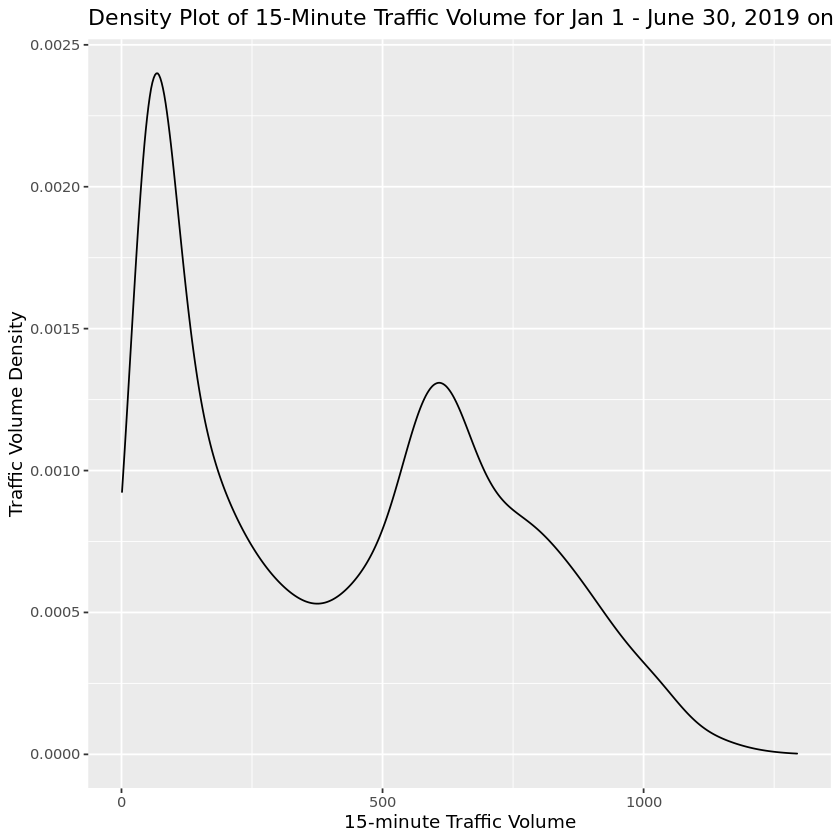

In [64]:
eng_dens_plot

In [65]:
eng_ts_plot <- ggplot(england_sample %>% filter(timestamp < '2019-01-21')) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("15-Minute Traffic for Jan 1 - Jan 20, 2019 on the {england_highway_name} at Sensor {england_sensor_name}"))

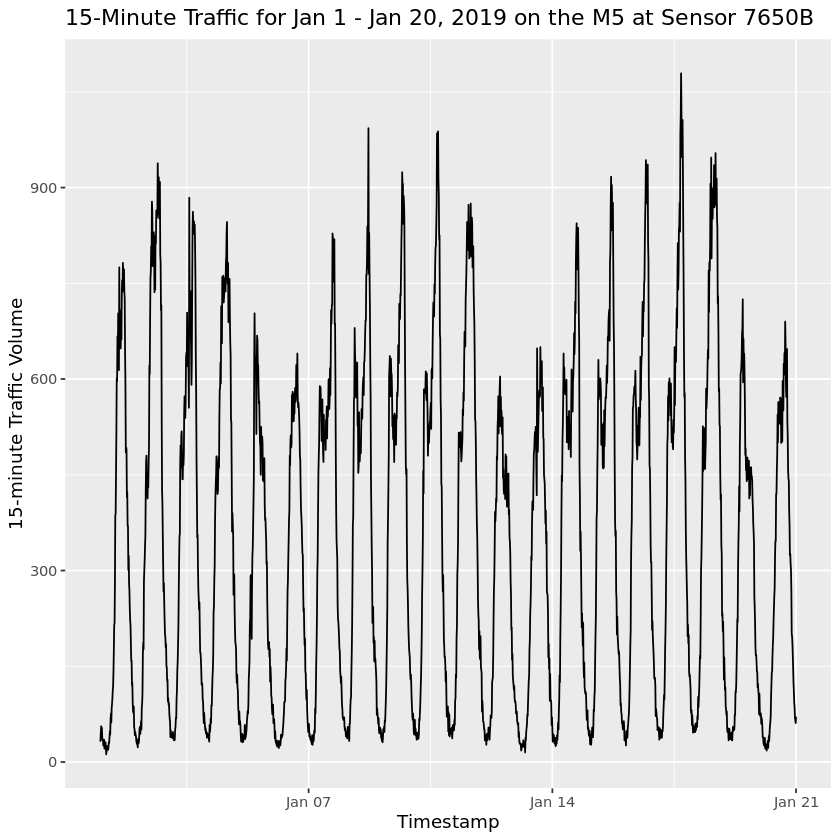

In [66]:
eng_ts_plot

In [67]:
eng_daily_plot <- ggplot(england_sample %>% filter(timestamp < '2019-01-21')) + 
    geom_point(aes(x=interval_of_day, y=total_volume, col=as.factor(day_of_week)), alpha=0.5) + 
    labs(y="15-minute Traffic Volume", x = "Interval of Day", col="Day of Week") + 
    ggtitle(str_glue("Daily Pattern of 15-Minute Traffic Volume for Jan 1 - Jan 20, 2019 on the {england_highway_name} at Sensor {england_sensor_name}"))

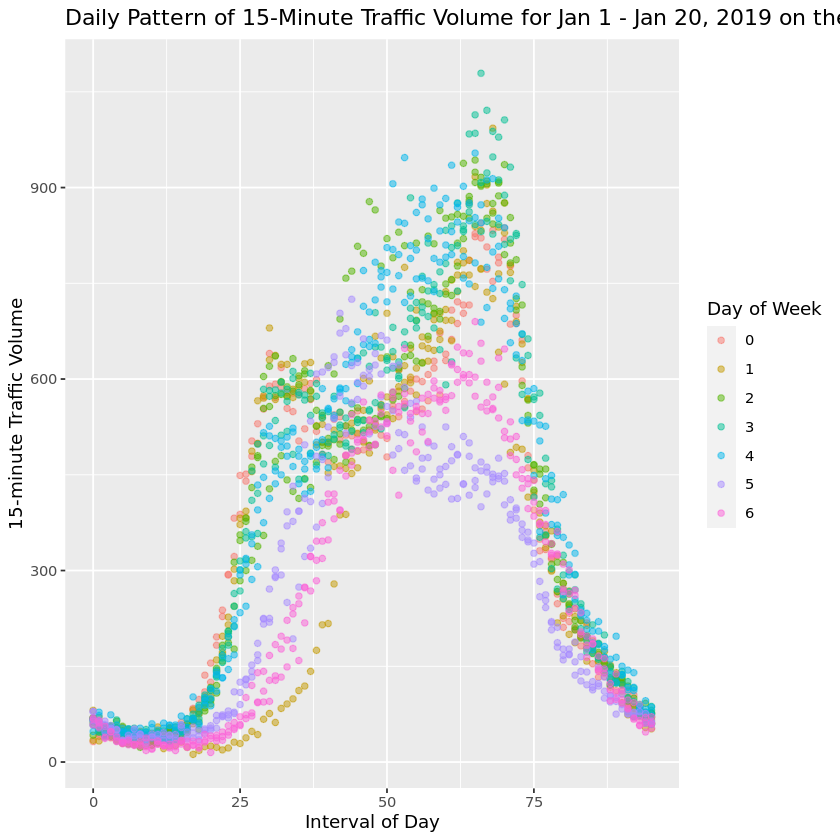

In [68]:
eng_daily_plot

In [69]:
eng_acf <- acf((england_sample %>% filter(timestamp < '2019-07-01'))$total_volume, lag=96*8, plot=FALSE)
eng_acf_ci_lo <- 1.96/(nrow(england_sample %>% filter(timestamp < '2019-07-01'))^0.5)
eng_acf_ci_hi <- -1*1.96/(nrow(england_sample %>% filter(timestamp < '2019-07-01'))^0.5)

In [70]:
eng_acf_plot <- ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=eng_acf$lag, xend = eng_acf$lag, y=eng_acf$acf, yend = 0)) +
    geom_hline(aes(yintercept = eng_acf_ci_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = eng_acf_ci_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of 15-Minute Traffic Volume for Jan 1 - June 30, 2019 on the {england_highway_name} at Sensor {england_sensor_name}"))

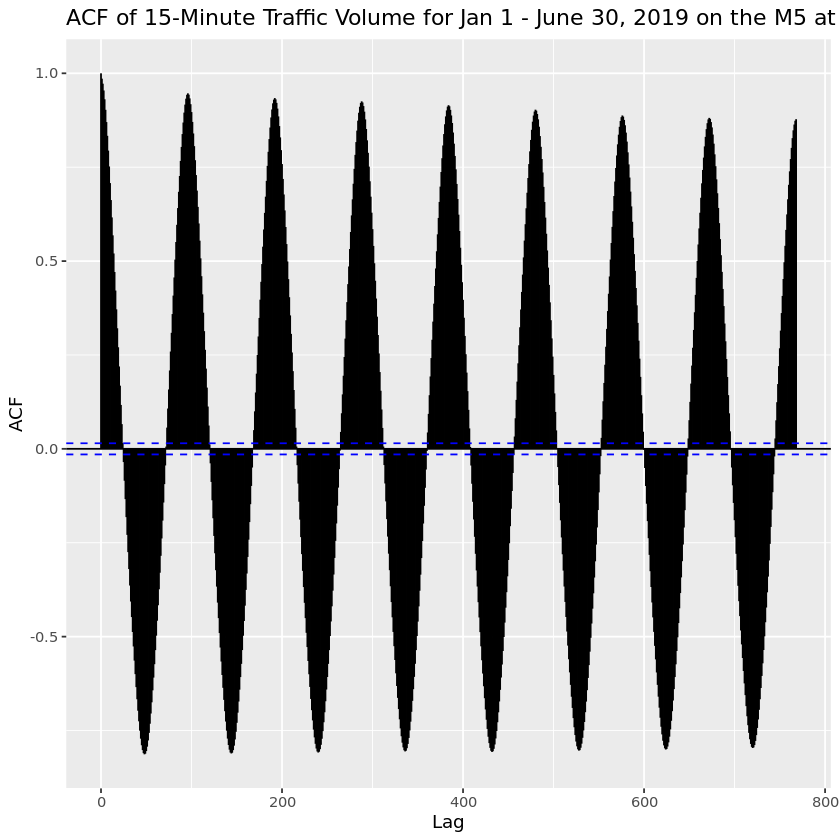

In [71]:
eng_acf_plot

In [72]:
ggsave("Plots/EDA/eng_volume_dens.png", eng_dens_plot, width=10, height=5)

In [73]:
ggsave("Plots/EDA/eng_ts_sample.png", eng_ts_plot, width=10, height=5)

In [74]:
ggsave("Plots/EDA/eng_daily_pattern.png", eng_daily_plot, width=10, height=5)

In [75]:
ggsave("Plots/EDA/eng_acf.png", eng_acf_plot, width=10, height=5)

## Portland

In [76]:
portland_sample <- portland_df_list_int[[8]]

In [77]:
head(portland_sample)

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I84/101161,0,2019-01-07,7,2019-01-07 00:14:00,0,61.71,14,FALSE,FALSE
I84/101161,0,2019-01-07,7,2019-01-07 00:29:00,1,65.67,12,FALSE,FALSE
I84/101161,0,2019-01-07,7,2019-01-07 00:44:00,2,65.44,9,FALSE,FALSE
I84/101161,0,2019-01-07,7,2019-01-07 00:59:00,3,65.50,2,FALSE,FALSE
I84/101161,0,2019-01-07,7,2019-01-07 01:14:00,4,69.87,8,FALSE,FALSE
I84/101161,0,2019-01-07,7,2019-01-07 01:29:00,5,66.20,5,FALSE,FALSE


In [78]:
port_dens_plot <- ggplot(portland_sample %>% filter(timestamp < '2019-07-01')) + 
    geom_density(aes(x=total_volume)) + 
    labs(y="Traffic Volume Density", x = "15-minute Traffic Volume") + 
    ggtitle(str_glue("Density Plot of 15-Minute Traffic Volume for Jan 1 - June 30, 2019 on the {portland_highway_name} at Sensor {portland_sensor_name}"))

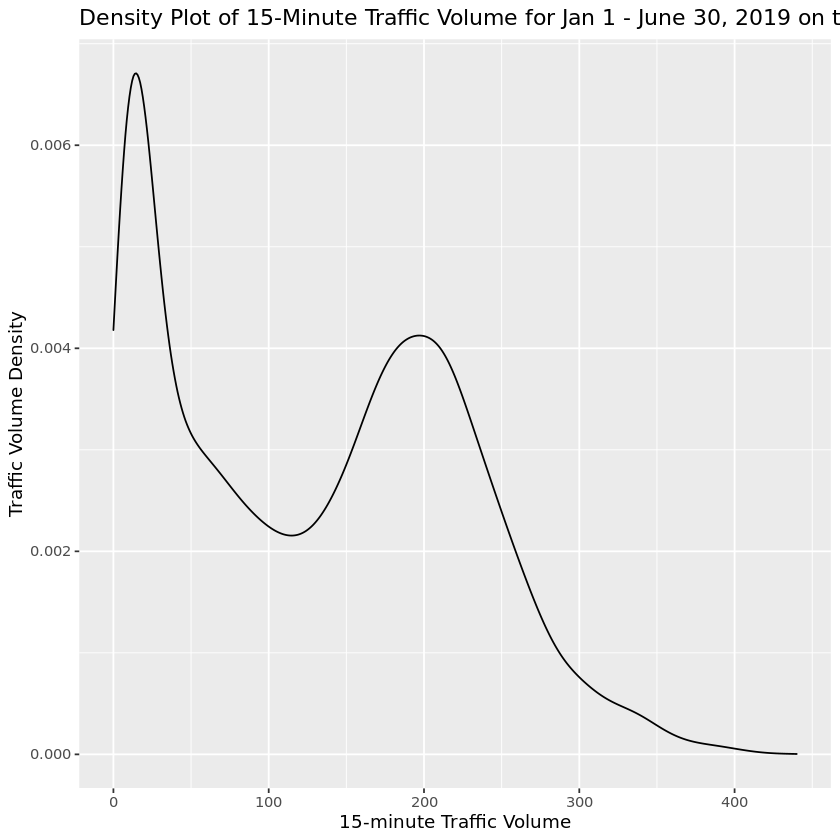

In [79]:
port_dens_plot

In [80]:
port_ts_plot <- ggplot(portland_sample %>% filter(timestamp >= '2019-03-01' & timestamp < '2019-03-21')) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("15-Minute Traffic for Mar 1 - Mar 20, 2019 on the {portland_highway_name} at Sensor {portland_sensor_name}"))

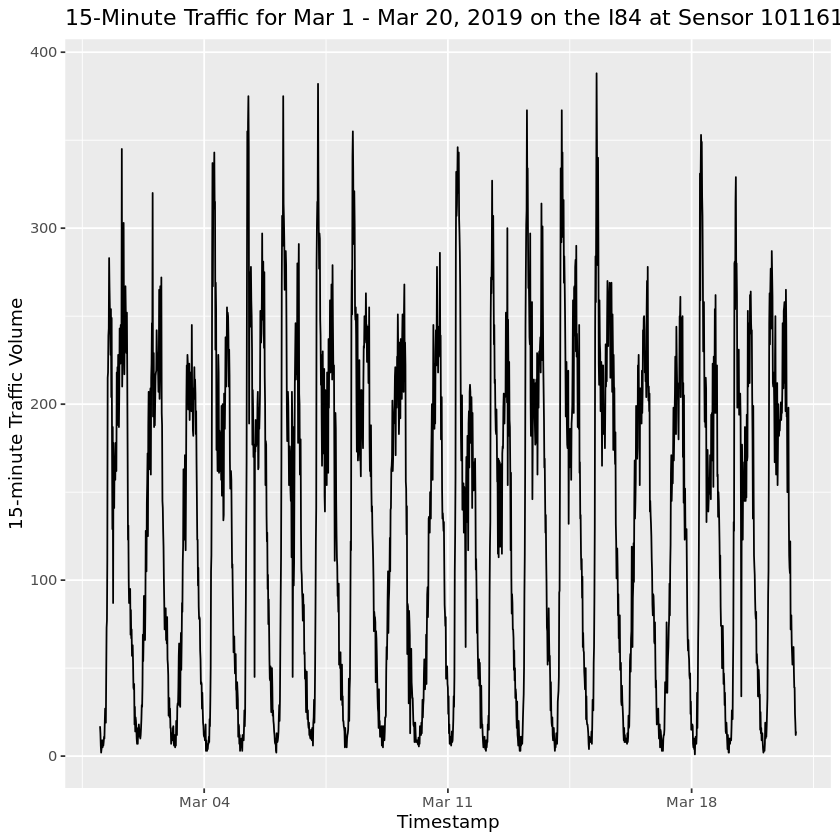

In [81]:
port_ts_plot

In [82]:
port_daily_plot <- ggplot(portland_sample %>% filter(timestamp >= '2019-03-01' & timestamp < '2019-03-21')) + 
    geom_point(aes(x=interval_of_day, y=total_volume, col=as.factor(day_of_week)), alpha=0.5) + 
    labs(y="15-minute Traffic Volume", x = "Interval of Day", col="Day of Week") + 
    ggtitle(str_glue("Daily Pattern of 15-Minute Traffic Volume for Mar 1 - Mar 20, 2019 on the {portland_highway_name} at Sensor {portland_sensor_name}"))

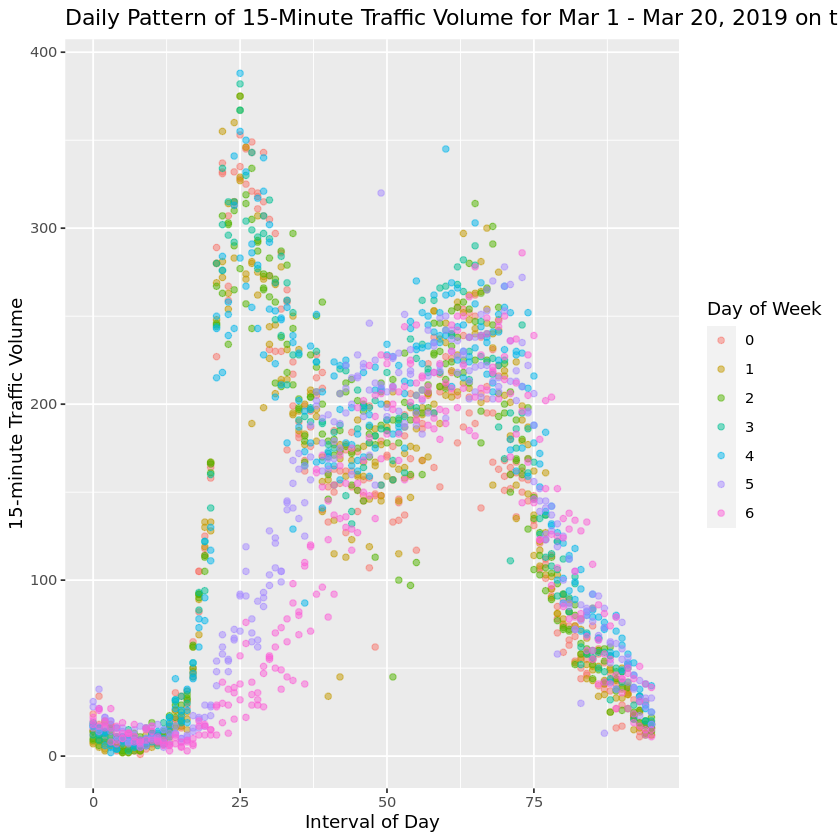

In [83]:
port_daily_plot

In [84]:
port_acf <- acf((portland_sample %>% filter(timestamp < '2019-07-01'))$total_volume, lag=96*8, plot=FALSE)
port_acf_ci_lo <- 1.96/(nrow(portland_sample %>% filter(timestamp < '2019-07-01'))^0.5)
port_acf_ci_hi <- -1*1.96/(nrow(portland_sample %>% filter(timestamp < '2019-07-01'))^0.5)

In [85]:
port_acf_plot <- ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=port_acf$lag, xend = port_acf$lag, y=port_acf$acf, yend = 0)) +
    geom_hline(aes(yintercept = port_acf_ci_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = port_acf_ci_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of 15-Minute Traffic Volume for Jan 1 - June 30, 2019 on the {portland_highway_name} at Sensor {portland_sensor_name}"))

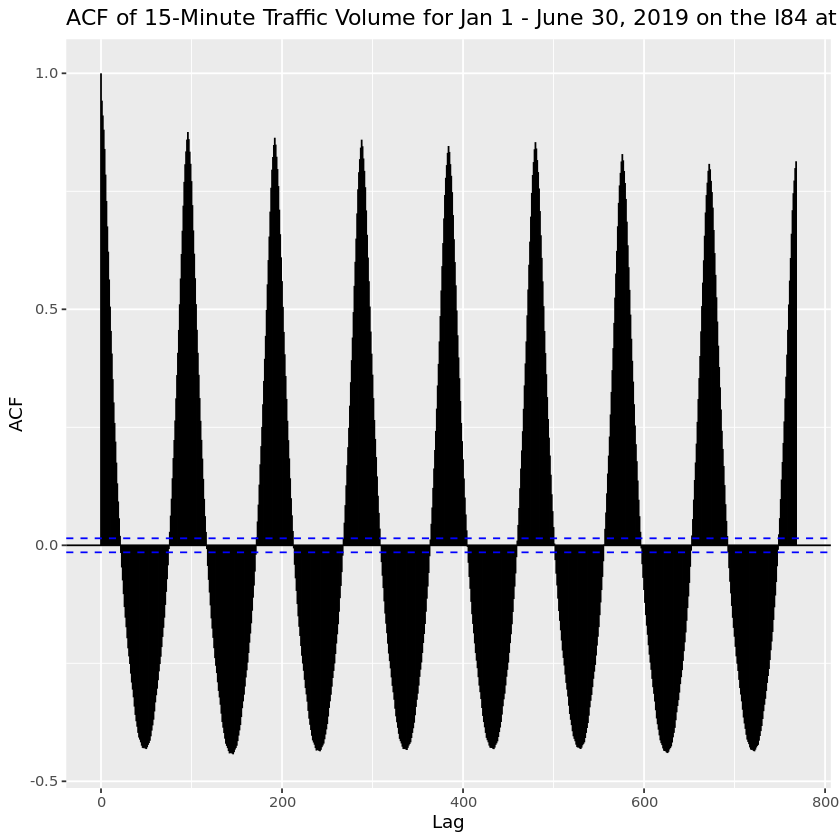

In [86]:
port_acf_plot

In [87]:
ggsave("Plots/EDA/port_volume_dens.png", port_dens_plot, width=10, height=5)

In [88]:
ggsave("Plots/EDA/port_ts_sample.png", port_ts_plot, width=10, height=5)

In [89]:
ggsave("Plots/EDA/port_daily_pattern.png", port_daily_plot, width=10, height=5)

In [90]:
ggsave("Plots/EDA/port_acf.png", port_acf_plot, width=10, height=5)

## Utah

In [91]:
utah_sample <- utah_df_list_int_15[[3]]

In [92]:
head(utah_sample)

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I215/134,0,2019-01-07,7,2019-01-07 00:14:00,0,69.93333,121,FALSE,FALSE
I215/134,0,2019-01-07,7,2019-01-07 00:29:00,1,70.13333,140,FALSE,FALSE
I215/134,0,2019-01-07,7,2019-01-07 00:44:00,2,73.30000,101,FALSE,FALSE
I215/134,0,2019-01-07,7,2019-01-07 00:59:00,3,70.06667,87,FALSE,FALSE
I215/134,0,2019-01-07,7,2019-01-07 01:14:00,4,71.13333,66,FALSE,FALSE
I215/134,0,2019-01-07,7,2019-01-07 01:29:00,5,69.13333,68,FALSE,FALSE


In [93]:
utah_dens_plot <- ggplot(utah_sample %>% filter(timestamp < '2019-07-01')) + 
    geom_density(aes(x=total_volume)) + 
    labs(y="Traffic Volume Density", x = "15-minute Traffic Volume") + 
    ggtitle(str_glue("Density Plot of 15-Minute Traffic Volume for Jan 1 - June 30, 2019 on the {utah_highway_name} at Sensor {utah_sensor_name}"))

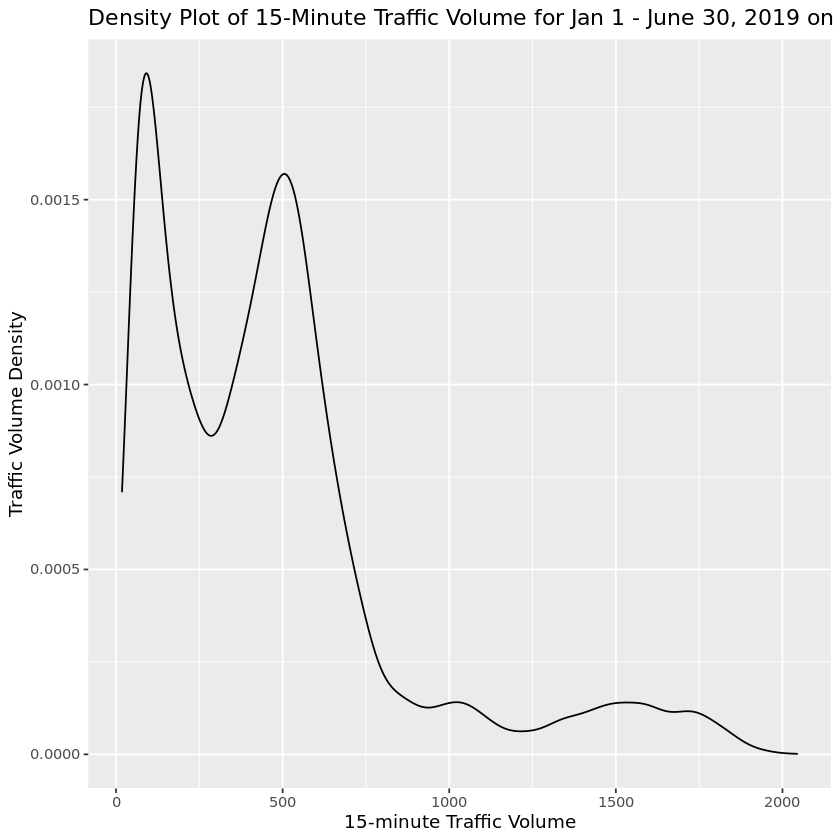

In [94]:
utah_dens_plot

In [95]:
utah_ts_plot <- ggplot(utah_sample %>% filter(timestamp >= '2019-05-01' & timestamp < '2019-05-21')) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("15-Minute Traffic for May 1 - May 20, 2019 on the {utah_highway_name} at Sensor {utah_sensor_name}"))

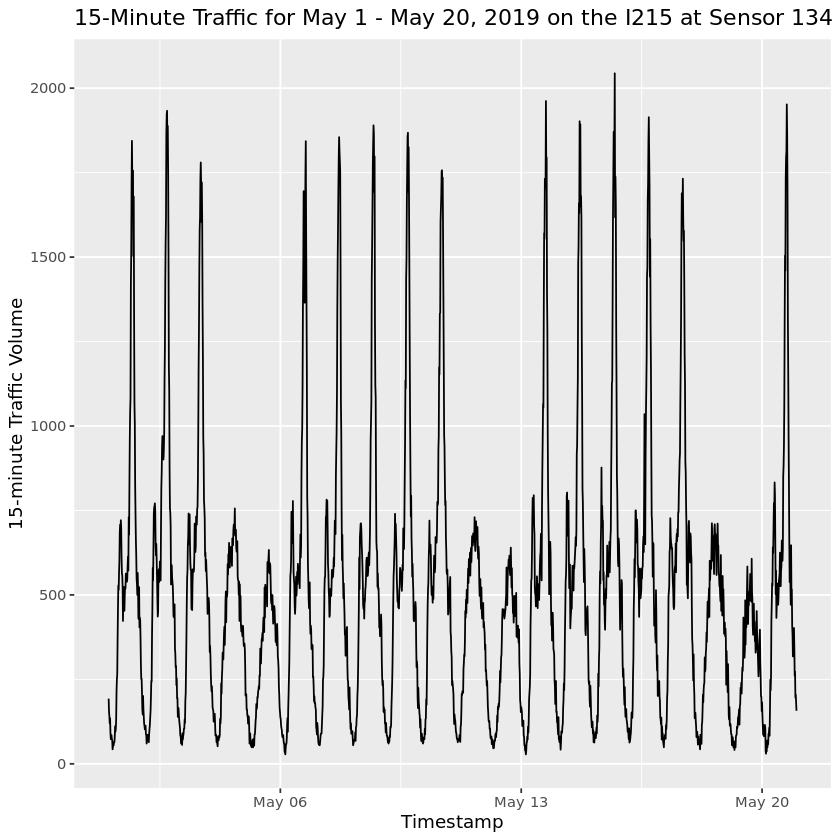

In [96]:
utah_ts_plot

In [97]:
utah_daily_plot <- ggplot(utah_sample %>% filter(timestamp >= '2019-05-01' & timestamp < '2019-05-21')) + 
    geom_point(aes(x=interval_of_day, y=total_volume, col=as.factor(day_of_week)), alpha=0.5) + 
    labs(y="15-minute Traffic Volume", x = "Interval of Day", col="Day of Week") + 
    ggtitle(str_glue("Daily Pattern of 15-Minute Traffic Volume for May 1 - May 20, 2019 on the {utah_highway_name} at Sensor {utah_sensor_name}"))

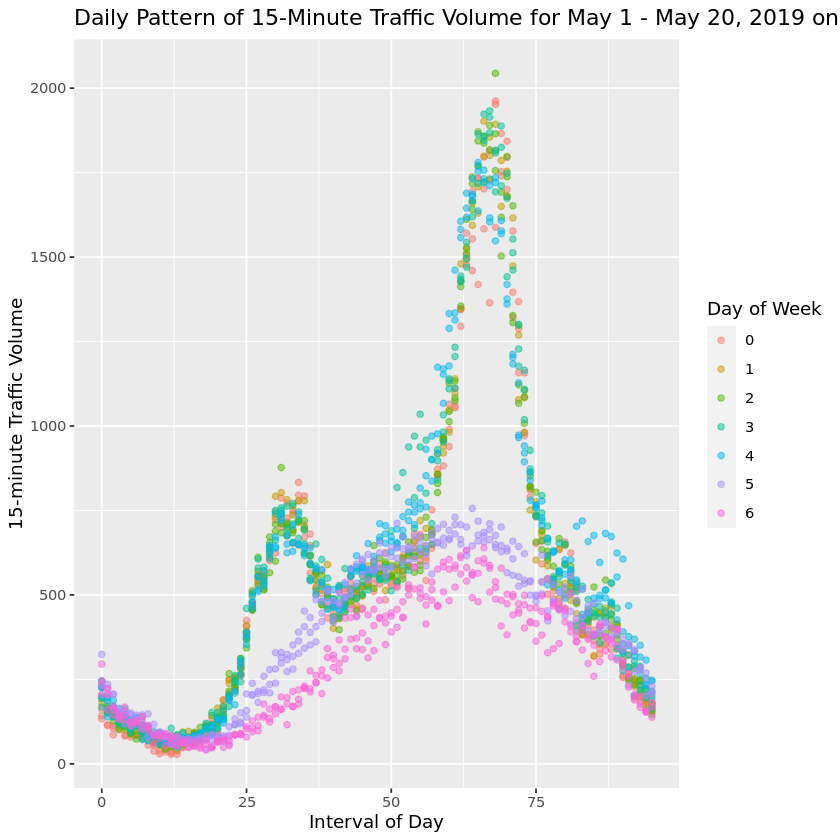

In [98]:
utah_daily_plot

In [99]:
utah_acf <- acf((utah_sample %>% filter(timestamp < '2019-07-01'))$total_volume, lag=96*8, plot=FALSE)
utah_acf_ci_lo <- 1.96/(nrow(utah_sample %>% filter(timestamp < '2019-07-01'))^0.5)
utah_acf_ci_hi <- -1*1.96/(nrow(utah_sample %>% filter(timestamp < '2019-07-01'))^0.5)

In [100]:
utah_acf_plot <- ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=utah_acf$lag, xend = utah_acf$lag, y=utah_acf$acf, yend = 0)) +
    geom_hline(aes(yintercept = utah_acf_ci_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = utah_acf_ci_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of 15-Minute Traffic Volume for Jan 1 - June 30, 2019 on the {utah_highway_name} at Sensor {utah_sensor_name}"))

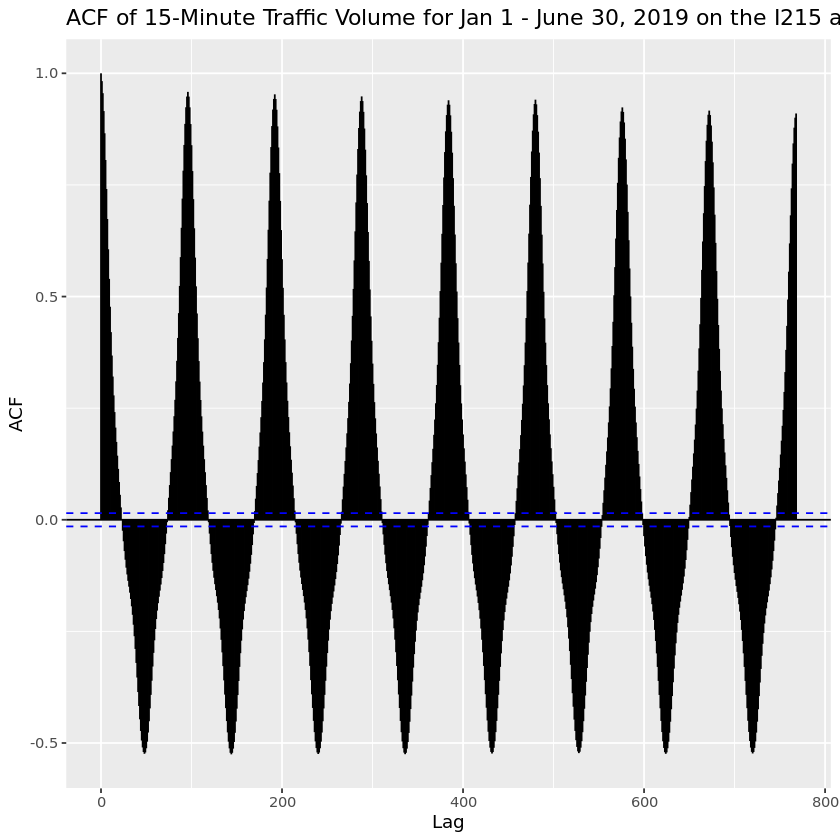

In [101]:
utah_acf_plot

In [102]:
ggsave("Plots/EDA/utah_volume_dens.png", utah_dens_plot, width=10, height=5)
ggsave("Plots/EDA/utah_ts_sample.png", utah_ts_plot, width=10, height=5)
ggsave("Plots/EDA/utah_daily_pattern.png", utah_daily_plot, width=10, height=5)
ggsave("Plots/EDA/utah_acf.png", utah_acf_plot, width=10, height=5)

# Comparisons Across Sensors

In [103]:
total_df_list_int <- append(append(england_df_list_int, portland_df_list_int), utah_df_list_int_15)
total_df_list_int <- lapply(total_df_list_int, function(x) x <- x %>% filter(timestamp < '2019-07-01'))

In [104]:
means <- unlist(lapply(total_df_list_int, function(x) mean(x$total_volume)))
sds <- unlist(lapply(total_df_list_int, function(x) sd(x$total_volume)))  
cols <- c(rep("England", length(england_df_list_int)), 
          rep("Portland", length(portland_df_list_int)),
          rep("Utah", length(utah_df_list_int_15)))                   

In [105]:
mean_box_plot <- ggplot() + 
    geom_violin(aes(x=cols, y=means)) + 
    geom_boxplot(aes(x=cols, y=means), width=0.1) + 
    labs(x="Highway System", y="Mean 15-minute Traffic Volume") + 
    ggtitle("Distribution of Mean 15-minute Traffic Volume per Sensor")

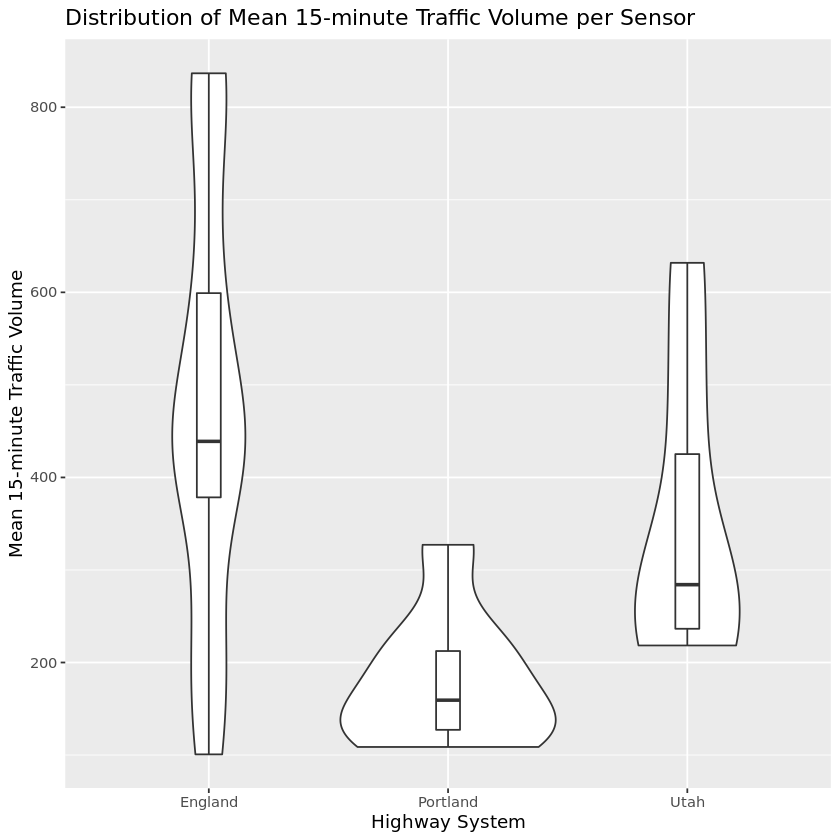

In [106]:
mean_box_plot

In [118]:
ggsave("Plots/EDA/mean_box.png", mean_box_plot, width=8, height=8)

In [119]:
sd_box_plot <- ggplot() + 
    geom_violin(aes(x=cols, y=sds)) + 
    geom_boxplot(aes(x=cols, y=sds), width=0.1) + 
    labs(x="Highway System", y="Standard Deviation of 15-minute Traffic Volume") + 
    ggtitle("Distribution of Standard Deviation of 15-minute Traffic Volume per Sensor")

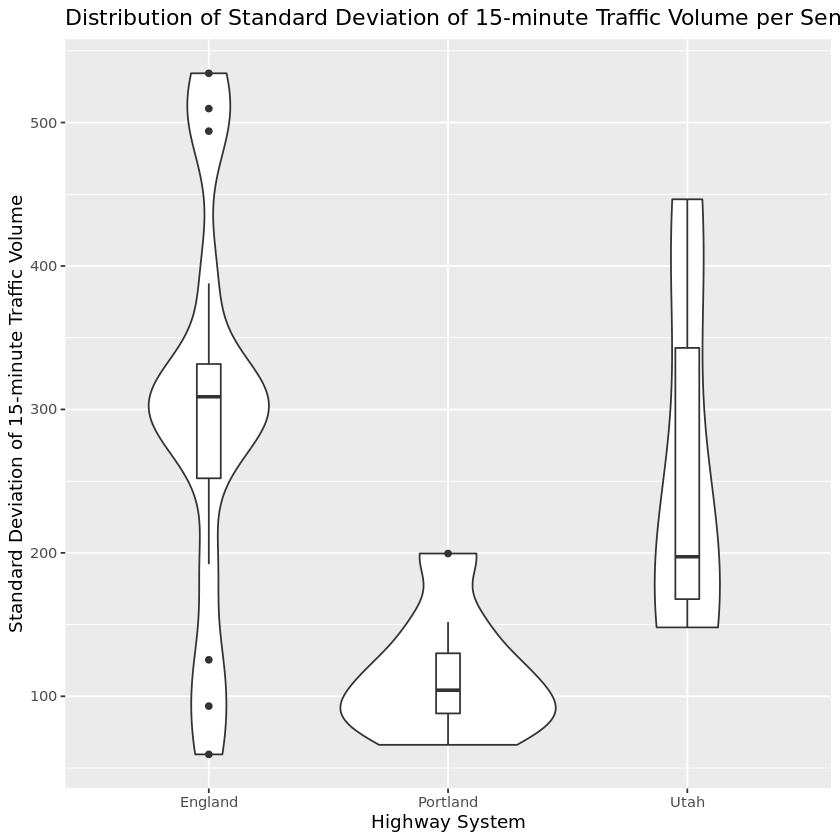

In [120]:
sd_box_plot

In [121]:
ggsave("Plots/EDA/sd_box.png", sd_box_plot, width=8, height=8)

In [111]:
total_df_int <- do.call(rbind, total_df_list_int)

In [137]:
total_density <- ggplot(total_df_int) + 
    geom_density(aes(x=total_volume, fill=site_name), alpha=0.33, show.legend=FALSE) +
    labs(x="15-minute Volume", y="Density") + 
    ggtitle("Density of 15-minute Traffic Volume per Sensor for Jan 1 - June 30, 2019")

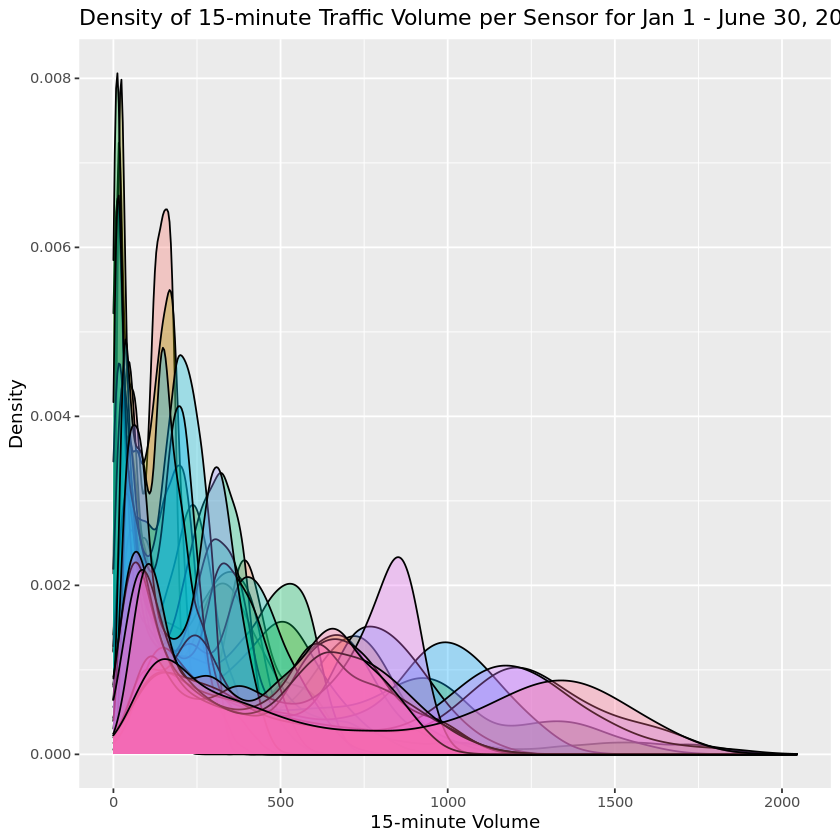

In [138]:
total_density

In [139]:
ggsave("Plots/EDA/full_dens.png", total_density, width=8, height=8)

In [140]:
total_density_ridges <- ggplot(total_df_int) +  
    geom_density_ridges(aes(x=total_volume, y=site_name, height = stat(density)),
                        stat = "density",
                        rel_min_height = 0.001, 
                        scale=1.75) +
    labs(x="15-minute Volume", y="Sensor") + 
    ggtitle("Density of 15-minute Traffic Volume per Sensor for Jan 1 - June 30, 2019")

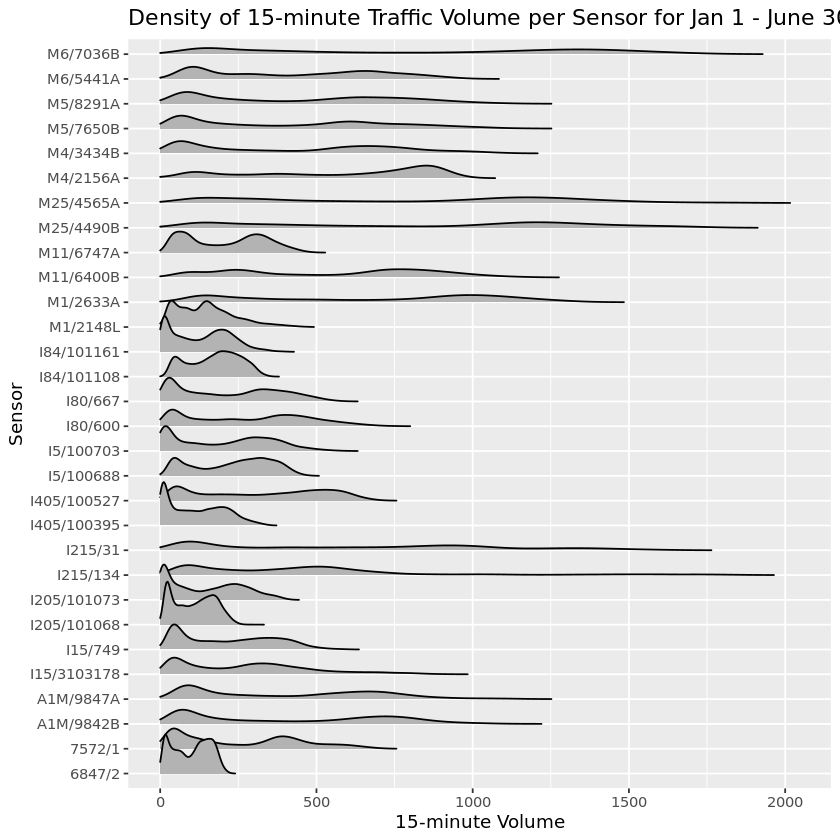

In [141]:
total_density_ridges

In [142]:
ggsave("Plots/EDA/full_dens_ridge.png", total_density_ridges, width=8, height=8)